In [11]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [12]:
train = pd.read_csv("/Users/priyankasingh/Documents/Project BAN620/train.csv")
test = pd.read_csv("/Users/priyankasingh/Documents/Project BAN620/test.csv")
stores = pd.read_csv("/Users/priyankasingh/Documents/Project BAN620/stores.csv")  
transactions = pd.read_csv("/Users/priyankasingh/Documents/Project BAN620/transactions.csv").sort_values(["store_nbr", "date"])
holidays = pd.read_csv("/Users/priyankasingh/Documents/Project BAN620/holidays_events.csv")
oil = pd.read_csv("/Users/priyankasingh/Documents/Project BAN620/oil.csv")

train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)
transactions["date"] = pd.to_datetime(transactions.date)
oil["date"] = pd.to_datetime(oil.date)

train.onpromotion = train.onpromotion.astype("float16")
train.sales = train.sales.astype("float32")
stores.cluster = stores.cluster.astype("int8")
print("Train dataset:\n", train.isnull().sum())
print("\nTest dataset:\n", test.isnull().sum())
print("\nStores dataset:\n", stores.isnull().sum())
print("\nTransactions dataset:\n", transactions.isnull().sum())
print("\nHolidays dataset:\n", holidays.isnull().sum())
print("\nOil dataset:\n", oil.isnull().sum())

Train dataset:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Test dataset:
 id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Stores dataset:
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Transactions dataset:
 date            0
store_nbr       0
transactions    0
dtype: int64

Holidays dataset:
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Oil dataset:
 date           0
dcoilwtico    43
dtype: int64


In [13]:
temp = pd.merge(train.groupby(["date", "store_nbr"]).sales.sum().reset_index(), transactions, how = "left")
print("Spearman Correlation between Total Sales and Transactions: {:,.4f}".format(temp.corr("spearman").sales.loc["transactions"]))
plot1 = px.line(transactions.sort_values(["store_nbr", "date"]), x='date', y='transactions', color='store_nbr',title = "Transactions" )
plot1.show()

/var/folders/b5/5htx_ppn15b1nyycc0280sjw0000gn/T/ipykernel_23505/2541597556.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Spearman Correlation between Total Sales and Transactions: 0.8175


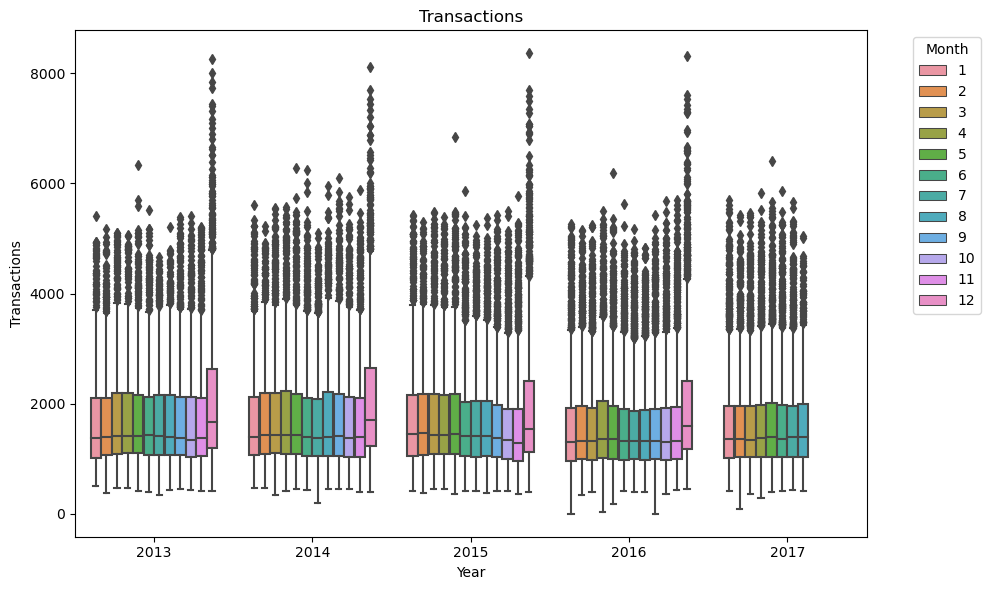

In [17]:
a = transactions.copy()
a["year"] = a.date.dt.year
a["month"] = a.date.dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(data=a, x="year", y="transactions", hue="month")
plt.title("Transactions")
plt.xlabel('Year')
plt.ylabel('Transactions')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

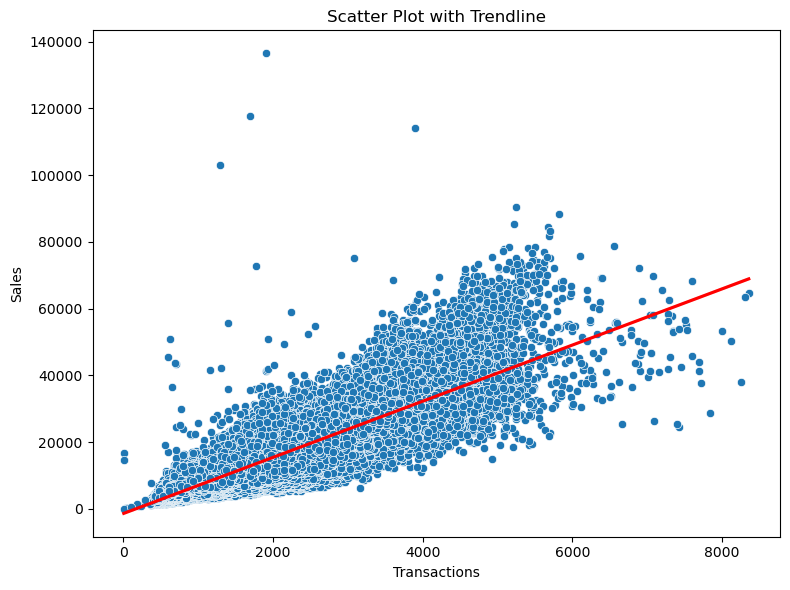

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=temp, x="transactions", y="sales")
sns.regplot(data=temp, x="transactions", y="sales", scatter=False, color='red')
plt.title("Scatter Plot with Trendline")
plt.xlabel("Transactions")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

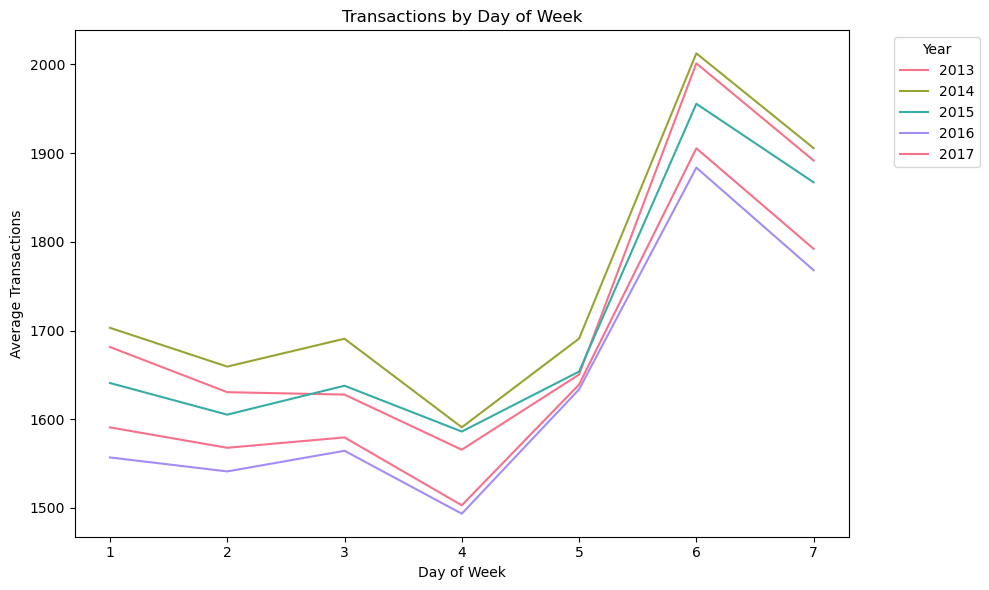

In [19]:
a = transactions.copy()
a["year"] = a.date.dt.year
a["dayofweek"] = a.date.dt.dayofweek+1
a = a.groupby(["year", "dayofweek"]).transactions.mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=a, x="dayofweek", y="transactions", hue="year", palette="husl")
plt.title("Transactions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Transactions")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
missing_values = oil['dcoilwtico'].isnull().sum()
print("Number of missing values:", missing_values)

oil['dcoilwtico'] = oil['dcoilwtico'].fillna(oil['dcoilwtico'].mean())

missing_values_after_imputation = oil['dcoilwtico'].isnull().sum()
print("Number of missing values after imputation:", missing_values_after_imputation)

Number of missing values: 43
Number of missing values after imputation: 0


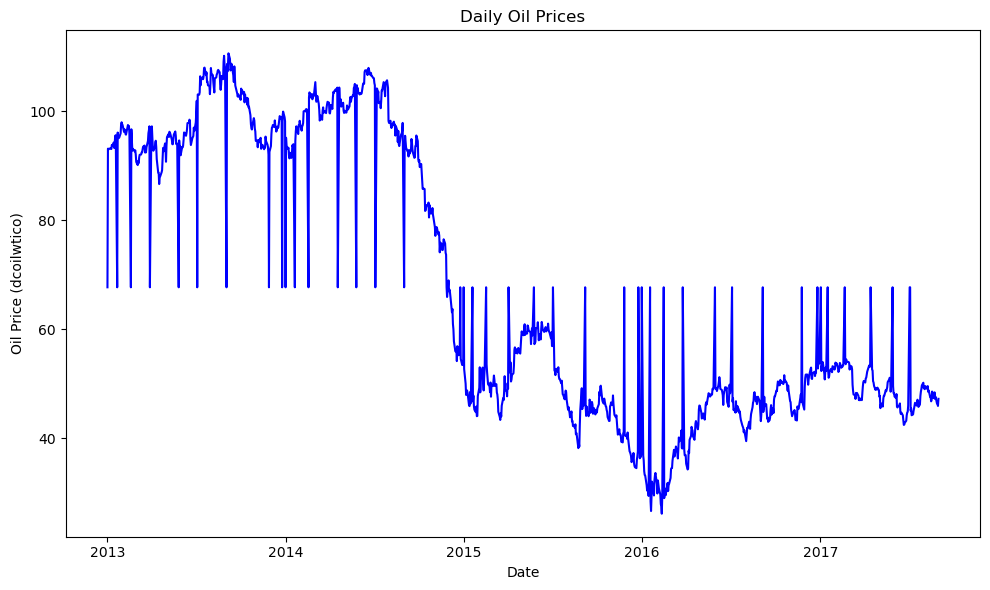

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=oil, x='date', y='dcoilwtico', color='blue')
plt.title("Daily Oil Prices")
plt.xlabel("Date")
plt.ylabel("Oil Price (dcoilwtico)")
plt.tight_layout()
plt.show()

In [22]:
oil_imputed = oil.copy()

imputer = KNNImputer(n_neighbors=5)
data_for_imputation = oil_imputed['dcoilwtico'].values.reshape(-1, 1)

imputed_values = imputer.fit_transform(data_for_imputation)

oil_imputed['dcoilwtico'] = imputed_values
missing_values_after_imputation = oil_imputed['dcoilwtico'].isnull().sum()
print("Number of missing values after imputation:", missing_values_after_imputation)

Number of missing values after imputation: 0


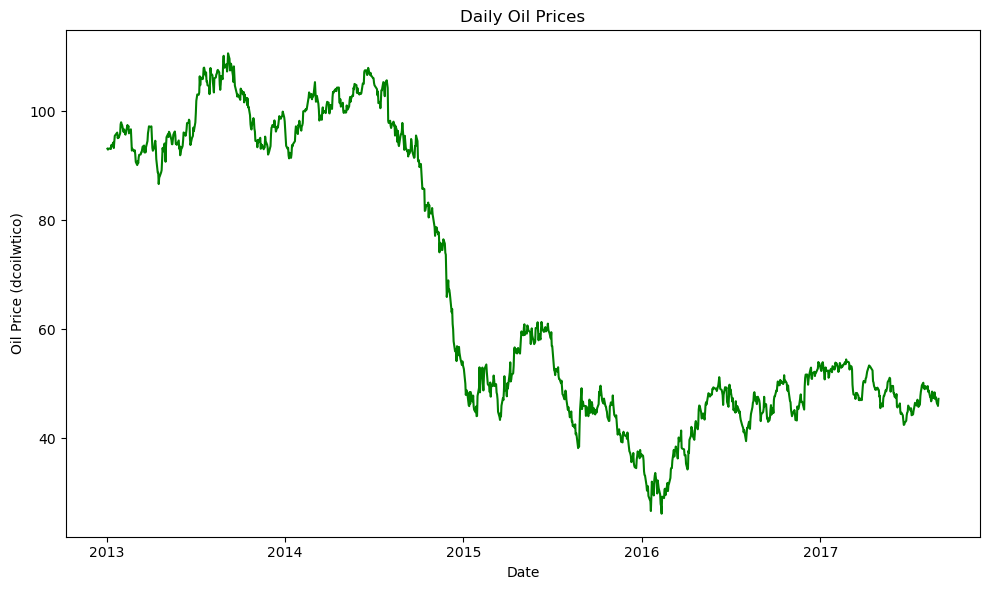

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=oil, x='date', y='dcoilwtico', color='green')
plt.title("Daily Oil Prices")
plt.xlabel("Date")
plt.ylabel("Oil Price (dcoilwtico)")
plt.tight_layout()
plt.show()

In [27]:
temp = pd.merge(temp, oil, how="left")
correlation = temp[['sales', 'transactions', 'dcoilwtico']].corr(method='spearman')

print("Correlation with Daily Oil Prices")
print(correlation['dcoilwtico'].loc[['sales', 'transactions']], "\n")


Correlation with Daily Oil Prices
sales          -0.320516
transactions    0.037647
Name: dcoilwtico, dtype: float64 



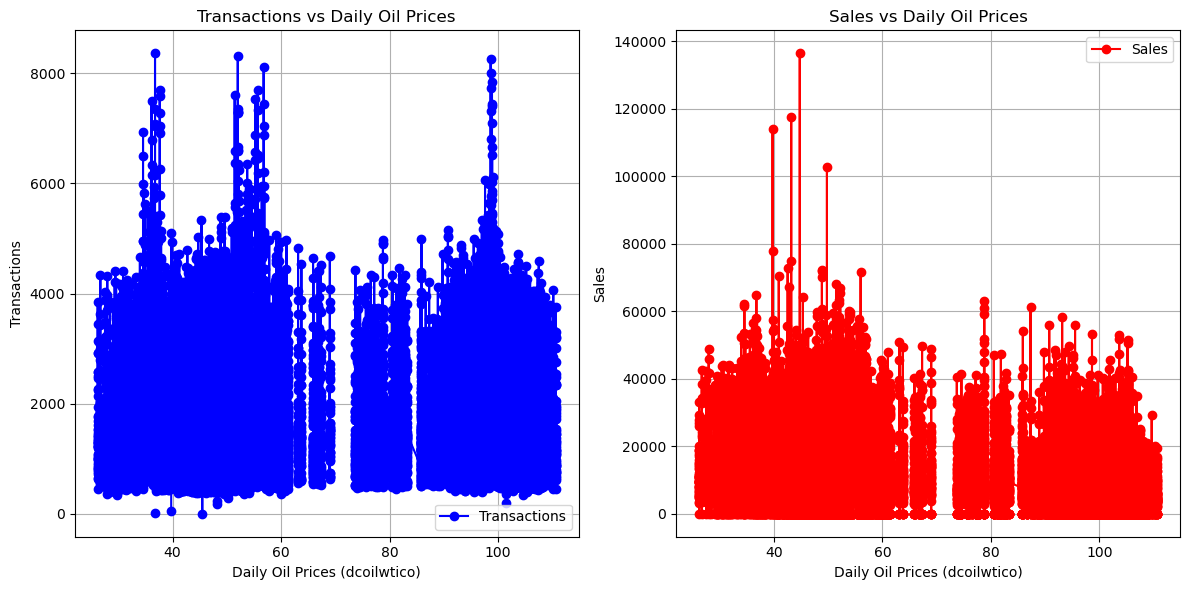

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].plot(temp['dcoilwtico'], temp['transactions'], label='Transactions', color='blue', marker='o', linestyle='-')
axes[0].set_xlabel('Daily Oil Prices (dcoilwtico)')
axes[0].set_ylabel('Transactions')
axes[0].set_title('Transactions vs Daily Oil Prices')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(temp['dcoilwtico'], temp['sales'], label='Sales', color='red', marker='o', linestyle='-')
axes[1].set_xlabel('Daily Oil Prices (dcoilwtico)')
axes[1].set_ylabel('Sales')
axes[1].set_title('Sales vs Daily Oil Prices')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()

plt.show()

/var/folders/b5/5htx_ppn15b1nyycc0280sjw0000gn/T/ipykernel_23505/2634777828.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b5/5htx_ppn15b1nyycc0280sjw0000gn/T/ipykernel_23505/2634777828.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



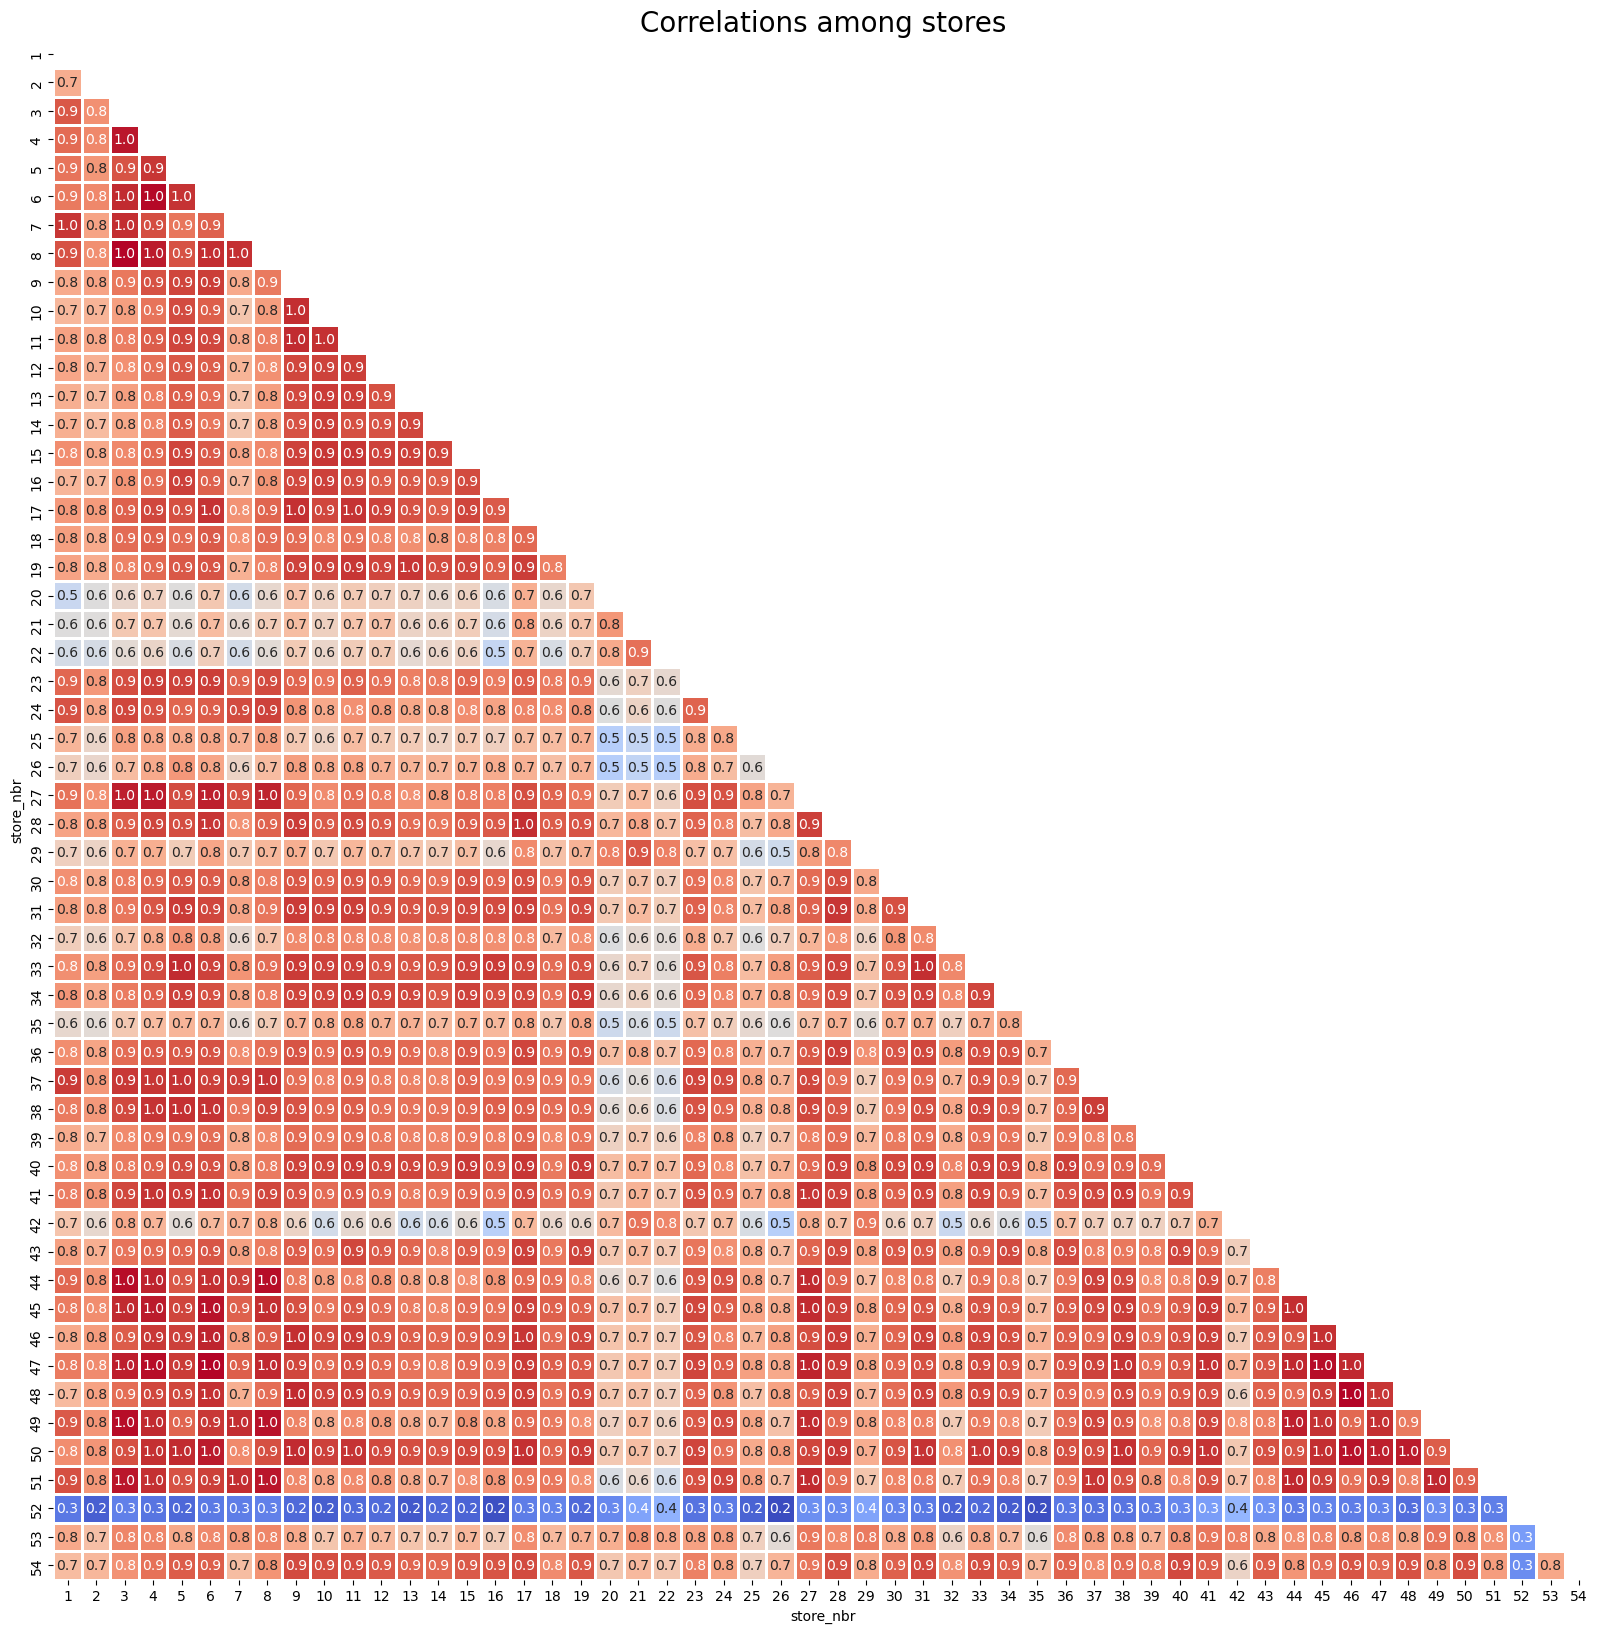

In [31]:
a = train[["store_nbr", "sales"]]
a["ind"] = 1
a["ind"] = a.groupby("store_nbr").ind.cumsum().values
a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()
mask = np.triu(a.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Correlations among stores",fontsize = 20)
plt.show()